In [13]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
import pprint
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# import apartment info from mongodb
db = client['apartments']
table = db['main_pages']

In [3]:
table.count_documents({})

586

In [4]:
apartment_collection = table.find()

In [5]:
#create new dataframe with just headers
df_columns = ['listing_id', 'property_name', 'address', 'mean_rent', 'mean_area', 'walkscore']
df = pd.DataFrame(columns=df_columns)

In [6]:
# for each apartment in collection parse html and 
# find the following info in collection 
# [name, address, price or price range, area, and Walkscore] 
# and add to Pandas DF
for apartment in apartment_collection:
    soup = BeautifulSoup(apartment['html'], 'html.parser')
    
    listing_id = apartment['listing_id']
    property_name = soup.find('h1', 'propertyName').text.strip()
    address_ = soup.find('div', 'propertyAddress').find('h2').text
    address = ' '.join(address_.split())
    
    # iterate through each unit and find mean price and area
    max_rents = []
    for unit in soup.find('table', 'availabilityTable').find('tbody').find_all('tr', 'rentalGridRow'):
        availability = unit.find('td', 'available').text.strip()
        # only look at max rents for simplicity
        unit_max_rent = unit['data-maxrent']
        if (availability == 'Available Now') and (unit_max_rent != ''):
            max_rents.append(int(unit_max_rent))
        else:
            break
            
    mean_rent = sum(max_rents) / len(max_rents)
#     print(address)
#     print(max_rents)
#     print(mean_rent)
    mean_area = 1
    walkscore = 1
    
    #add info to DF
    row = pd.DataFrame([[listing_id, 
                         property_name, 
                         address, 
                         mean_rent, 
                         mean_area, 
                         walkscore]], columns=df_columns)
    df = df.append(row, ignore_index=True)
    
#     break
    
    

ZeroDivisionError: division by zero

In [7]:
df

,listing_id,property_name,address,mean_rent,mean_area,walkscore
0,p9c5ygt,Dobie Twenty21 Student Spaces,"2021-2025 Guadalupe St, Austin, TX 78705",1791.500000,1,1
1,rdsyjd0,The District on La Frontera,"2811 La Frontera Blvd, Austin, TX 78728",2130.714286,1,1
2,vsvz28g,Cliffs at Barton Creek,"3050 Tamarron Blvd, Austin, TX 78746",2585.545455,1,1
3,pfzryrs,Radius On Grove,"2301 Grove Blvd, Austin, TX 78741",1604.000000,1,1
4,lb7xscf,Chandelier,"2336 Douglas St, Austin, TX 78741",1274.333333,1,1
...,...,...,...,...,...,...
62,tyhcqcc,The Nine on Shoreline,"3501 Shoreline Dr, Austin, TX 78728",1631.000000,1,1
63,kjp9dl8,Madison at Scofield Farms,"13401 Metric Blvd, Austin, TX 78727",1397.500000,1,1
64,f7p23ws,The Bowie,"311 Bowie St, Austin, TX 78703",4798.714286,1,1
65,sdgb1n5,Woodway Village,"4600 Nuckols Crossing Rd, Austin, TX 78744",1230.000000,1,1


(array([20., 30.,  9.,  4.,  2.,  0.,  1.,  0.,  0.,  1.]),
 array([ 997.   , 1619.768, 2242.536, 2865.304, 3488.072, 4110.84 ,
        4733.608, 5356.376, 5979.144, 6601.912, 7224.68 ]),
 <a list of 10 Patch objects>)

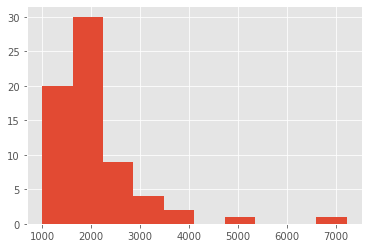

In [20]:
y = df['mean_rent']
plt.hist(df['mean_rent'])

In [ ]:
# Create column for cost/SF

# Create column for some metric comparing cost/SF and Walkscore. 
# Maybe it's the ((cost/SF) / Walkscore)